# Testing of the `floor` Extended GEKKO Functionality #

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from gekko import GEKKO
from aquaponics.gekko_extensions import register_extensions

## Basic Fish Model with No Floor ##

In [2]:
m = GEKKO()

tf = 15
steps = tf * 10 + 1
m.time = np.linspace(0,tf,steps)

FP = m.Var(value=10, lb=0)
km2 = m.Param(value=0.3)
FPdt = m.Var(value=-2)

m.Equation(FP.dt() == - FP * km2)
m.Equation(FPdt == FP.dt())

m.options.IMODE = 4
m.solve(disp=False)

Text(0.5,0,'Time (days)')

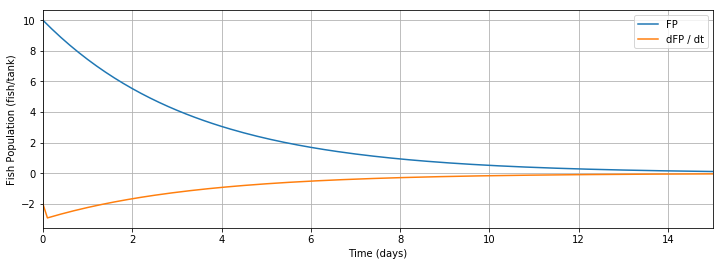

In [3]:
%matplotlib inline
plt.figure(figsize=(12,4))

plt.plot(m.time, FP, label='FP')
plt.plot(m.time, FPdt, label='dFP / dt')
plt.legend()
plt.grid()
plt.ylabel('Fish Population (fish/tank)')

plt.xlim(0, tf)
plt.xlabel('Time (days)')

## Basic Fish Model with Floor ##

In [4]:
m = register_extensions(GEKKO())

tf = 15
steps = tf * 10 + 1
m.time = np.linspace(0,tf,steps)

FP = m.Var(value=10, lb=0)
FPdt = m.Var(value=-2)
km2 = m.Param(value=0.3)

m.Equation(FP.dt() == -m.floor(FP * km2, n=10))
m.Equation(FPdt == FP.dt())

m.options.IMODE = 4
m.solve(disp=False)

Text(0.5,0,'Time (days)')

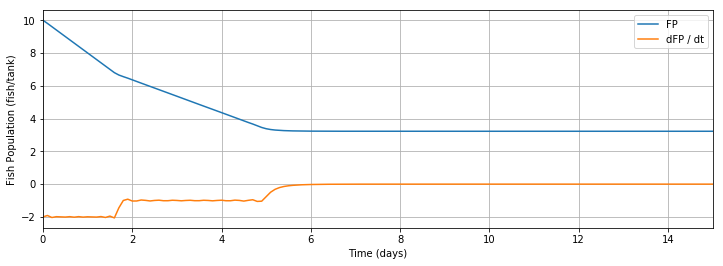

In [5]:
%matplotlib inline
plt.figure(figsize=(12,4))

plt.plot(m.time, FP, label='FP')
plt.plot(m.time, FPdt, label='dFP / dt')
plt.legend()
plt.grid()
plt.ylabel('Fish Population (fish/tank)')

plt.xlim(0, tf)
plt.xlabel('Time (days)')